<a href="https://colab.research.google.com/github/Damilola-A/Kidney_Disease_Prediction/blob/main/kidney_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model training and testing.

DATASET DESCRIPTION

The dataset is taken over 2-month period in India. It has 400 rows with 25 features like red blood cells, pedal edema, sugar,etc. The aim is to classify whether a patient has chronic kidney disease or not. The classification is based on a attribute named 'classification' which is either 'ckd'(chronic kidney disease) or 'notckd. I've performed cleaning of the dataset which includes mapping the text to numbers and some other changes. After the cleaning I've done some EDA(Exploratory Data Analysis) and then I've divided the dataset int training and testing and applied the models on them. It is observed that the classification results are not much satisfying initially. So, instead of dropping the rows with Nan values I've used the lambda function to replace them with mode for each column. After that I've divided the dataset again into training and testing sets and applied models on them. This time the results are better and we see that the random forest and decision trees are the best performers with an accuracy of 1.0 and 0 misclassifications. The performance of the classification is measured by printing confusion matrix, classification report and accuracy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
kd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/kidney_disease.csv')

kd.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar',
                      'rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria',
                      'bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium',
                      'pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count',
                      'rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                      'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema',
                      'ane':'anemia','classification':'class'}, inplace=True)

In [31]:
pd.set_option('display.max_columns', None)
kd.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [32]:
df = kd.copy()

# select categorical columns that are numbers
bad_cat_cols = ['packed cell volume',	'white blood cell count',	'red blood cell count']

for i in bad_cat_cols:
  df[i] = pd.to_numeric(df[i], errors = 'coerce')

new_cats = df.select_dtypes(include = ['category', 'object'])
new_num = df.select_dtypes(include = 'number')

print('\t \t \tCATEGORICAL COLUMNS')
display(new_cats.head())

print(f"\t \t \t \n \n NUMERICAL COLUMNS")
display(new_num.head())

	 	 	CATEGORICAL COLUMNS


,red blood cells,pus cell,pus cell clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


	 	 	 
 
 NUMERICAL COLUMNS


,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [24]:
for i in new_cats.columns:
  df[i].fillna(df[i].mode()[0], inplace = True)

for i in new_num.columns:
  df[i].fillna(df[i].median(), inplace = True)

df.isnull().sum()

age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

for i in new_cats:
  df[i] = encoder.fit_transform(df[i])

for i in new_num:
  df[[i]] = scaler.fit_transform(df[[i]])

df.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,1,1,0,0,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,1.053226,0.603224,-0.197314,0.550044,1,4,1,0,0,0,0
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,1,1,0,0,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,-0.457965,-0.132789,-0.909782,0.074073,0,3,1,0,0,0,0
2,0.615355,0.254214,-1.421074,0.838742,2.507853,1,1,0,0,3.697618,-0.074858,-0.212942,0.040104,-0.062903,-1.084556,-0.991470,-0.316059,0.074073,0,4,1,1,0,1,0
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,1,0,1,0,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,-0.494823,-0.868801,-0.632711,-0.996862,1,3,1,1,1,1,0
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,1,1,0,0,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,-0.347390,-0.500795,-0.395222,-0.163913,0,3,1,0,0,0,0


<Axes: >

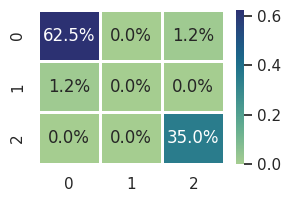

In [26]:
# Prepare the data
X = df.drop(['class'], axis=1)
y = df['class']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(cm/np.sum(cm), annot=True, cmap='crest', fmt='.1%', linewidth=1)

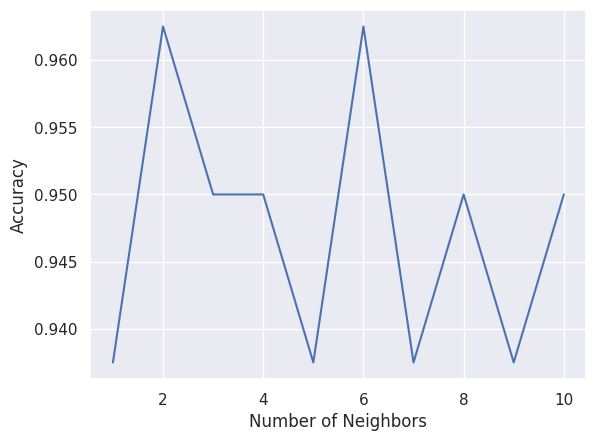

In [27]:
# Find the optimal number of neighbors
accuracy = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append((y_pred == y_test).mean())

plt.plot(range(1, 11), accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# Apply random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.9875
